In [45]:
import math
import meep as mp
from meep import mpb

import numpy as np
import matplotlib.pyplot as plt

In [117]:
#屈折率
n_Air = 1
n_Si = 2.6
r = 1/10

R = 1.1

#計算する固有周波数の数
num_bands = 6

#メッシュの細かさ
resolution = 64

#単位格子
geometry_lattice = mp.Lattice(size=mp.Vector3(1, 1),
                              basis1=mp.Vector3(1./2, np.sqrt(3)/2),
                              basis2=mp.Vector3(1./2, -np.sqrt(3)/2))

#構造
#default_material = mp.Medium(epsilon=n_Si**2)
geometry = [
            mp.Block(material=mp.Medium(epsilon=n_Si**2),
                        size=mp.Vector3(mp.inf, mp.inf)),

            mp.Cylinder(r, center=mp.Vector3(1 / 3, 1 / 3)*R, height=mp.inf,
                        material=mp.Medium(epsilon=n_Air**2)),
            
            mp.Cylinder(r, center=mp.Vector3(1 / 3, 0)*R, height=mp.inf,
                        material=mp.Medium(epsilon=n_Air**2)),

            mp.Cylinder(r, center=mp.Vector3(0, -1 /3)*R, height=mp.inf,
                        material=mp.Medium(epsilon=n_Air**2)),

            mp.Cylinder(r, center=mp.Vector3(-1 / 3, -1 / 3)*R, height=mp.inf,
                        material=mp.Medium(epsilon=n_Air**2)),

            mp.Cylinder(r, center=mp.Vector3(-1 / 3, 0)*R, height=mp.inf,
                        material=mp.Medium(epsilon=n_Air**2)),
    
            mp.Cylinder(r, center=mp.Vector3(0, 1 /3)*R, height=mp.inf,
                        material=mp.Medium(epsilon=n_Air**2))
    
           ]


#ブリルアンゾーン
k_points = [
    mp.Vector3(),               # Gamma
    mp.Vector3(1./2, 0),          # M
    mp.Vector3(1./3, 1./3),    # K
    mp.Vector3(),               # Gamma
]
k_points = mp.interpolate(4, k_points)

In [118]:
#計算
ms = mpb.ModeSolver(
    geometry=geometry,
    geometry_lattice=geometry_lattice,
    k_points=k_points,
    resolution=resolution,
    num_bands=num_bands
)

ms.run_tm(mpb.output_at_kpoint(mp.Vector3(-1./3, 1./3),
                               mpb.fix_efield_phase,
                               mpb.output_efield_z))
tm_freqs = ms.all_freqs
tm_gaps = ms.gap_list
ms.run_te()
te_freqs = ms.all_freqs
te_gaps = ms.gap_list

Initializing eigensolver data
Computing 6 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 64 x 64 x 1.
Solving for 6 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (0.5, 0.866025, 0)
     (0.5, -0.866025, 0)
     (0, 0, 1)
Cell volume = 0.866025
Reciprocal lattice vectors (/ 2 pi):
     (1, 0.57735, -0)
     (1, -0.57735, 0)
     (-0, 0, 1)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1e+20,0)
          axes (1,0,0), (0,1,0), (0,0,1)
     cylinder, center = (0.366667,0.366667,0)
          radius 0.1, height 1e+20, axis (0, 0, 1)
     cylinder, center = (0.366667,0,0)
          radius 0.1, height 1e+20, axis (0, 0, 1)
     cylinder, center = (0,-0.366667,0)
          radius 0.1, height 1e+20, axis (0, 0, 1)
     cylinder, center = (-0.366667,-0.366667,0)
          radius 0.1, height 1e+20, axis (0, 0, 1)
     cylinder, center = (-0.366667,0,0)
          radius 0.1, height 1e+20, axis (0, 0, 1)
     cylinder, cent

Solving for bands 2 to 6...
Finished solving for bands 2 to 6 after 17 iterations.
tefreqs:, 1, 0, 0, 0, 0, 0, 0.488909, 0.488991, 0.517349, 0.527301, 0.527378
elapsed time for k point: 0.15285205841064453
solve_kpoint (0.1,0,0):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 12 iterations.
tefreqs:, 2, 0.1, 0, 0, 0.11547, 0.0523643, 0.461099, 0.475407, 0.502418, 0.544894, 0.557855
elapsed time for k point: 0.07844734191894531
solve_kpoint (0.2,0,0):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 10 iterations.
tefreqs:, 3, 0.2, 0, 0, 0.23094, 0.104673, 0.413787, 0.455859, 0.491506, 0.576388, 0.584802
elapsed time for k point: 0.0797278881072998
solve_kpoint (0.3,0,0):
Solving for bands 1 to 6...
Finished solving for bands 1 to 6 after 9 iterations.
tefreqs:, 4, 0.3, 0, 0, 0.34641, 0.156853, 0.363792, 0.440206, 0.482468, 0.610755, 0.612016
elapsed time for k point: 0.07006573677062988
solve_kpoint (0.4,0,0):
Solving for bands 1 to 6...
Finished

In [119]:
md = mpb.MPBData(rectify=True, periods=5, resolution=64)
eps = ms.get_epsilon()
converted_eps = md.convert(eps)
converted_eps.shape

epsilon: 1-6.76, mean 5.5063, harm. mean 3.15316, 82.5195% > 1, 78.2344% "fill"


(320, 277)

In [120]:
#import csv
#with open('epsilon_distribution.csv', 'wt') as f:
#    writer = csv.writer(f)
#    writer.writerows(converted_eps)

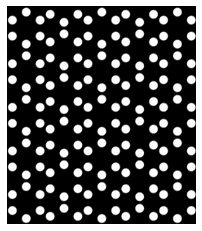

In [121]:
plt.imshow(converted_eps, interpolation='spline36', cmap="binary")
plt.axis('off')
plt.show()

In [122]:
tm_freqs.max()

0.6463627387780623

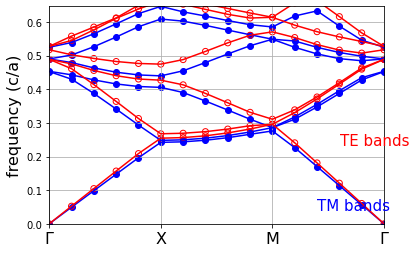

In [123]:
fig, ax = plt.subplots()

x = range(len(tm_freqs))

# Plot bands
# Scatter plot for multiple y values, see https://stackoverflow.com/a/34280815/2261298
for xz, tmz, tez in zip(x, tm_freqs, te_freqs):
    ax.scatter([xz]*len(tmz), tmz, color='blue')
    ax.scatter([xz]*len(tez), tez, color='red', facecolors='none')
ax.plot(tm_freqs, color='blue')
ax.plot(te_freqs, color='red')
ax.set_ylim([tm_freqs.min(), tm_freqs.max()])
ax.set_xlim([x[0], x[-1]])

# Plot gaps
for gap in tm_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='blue', alpha=0.2)

for gap in te_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='red', alpha=0.2)


# Plot labels
ax.text(12, 0.04, 'TM bands', color='blue', size=15)
ax.text(13.05, 0.235, 'TE bands', color='red', size=15)

points_in_between = (len(tm_freqs) - 4) / 3
tick_locs = [i*points_in_between+i for i in range(4)]
tick_labs = ['Γ', 'X', 'M', 'Γ']
ax.set_xticks(tick_locs)
ax.set_xticklabels(tick_labs, size=16)
ax.set_ylabel('frequency (c/a)', size=16)
ax.grid(True)

plt.show()

In [111]:
efields = []

def get_efields(ms, band):
    efields.append(ms.get_efield(band, bloch_phase=True))

ms.run_tm(mpb.output_at_kpoint(mp.Vector3(1 / -3, 1 / 3), mpb.fix_efield_phase,
          get_efields))

# Create an MPBData instance to transform the efields
md = mpb.MPBData(rectify=True, resolution=32, periods=3)

converted = []
for f in efields:
    # Get just the z component of the efields
    f = f[..., 0, 2]
    converted.append(md.convert(f))

for i, f in enumerate(converted):
    plt.subplot(331 + i)
    plt.contour(converted_eps.T, cmap='binary')
    plt.imshow(np.real(f).T, interpolation='spline36', cmap='bwr', alpha=0.9)
    plt.axis('off')

plt.show()

Initializing eigensolver data
Computing 6 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 64 x 64 x 1.
Solving for 6 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (0.5, 0.866025, 0)
     (0.5, -0.866025, 0)
     (0, 0, 1)
Cell volume = 0.866025
Reciprocal lattice vectors (/ 2 pi):
     (1, 0.57735, -0)
     (1, -0.57735, 0)
     (-0, 0, 1)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1e+20,0)
          axes (1,0,0), (0,1,0), (0,0,1)
     cylinder, center = (0.333333,0.333333,0)
          radius 0.1, height 1e+20, axis (0, 0, 1)
     cylinder, center = (0.333333,0,0)
          radius 0.1, height 1e+20, axis (0, 0, 1)
     cylinder, center = (0,-0.333333,0)
          radius 0.1, height 1e+20, axis (0, 0, 1)
     cylinder, center = (-0.333333,-0.333333,0)
          radius 0.1, height 1e+20, axis (0, 0, 1)
     cylinder, center = (-0.333333,0,0)
          radius 0.1, height 1e+20, axis (0, 0, 1)
     cylinder, cent

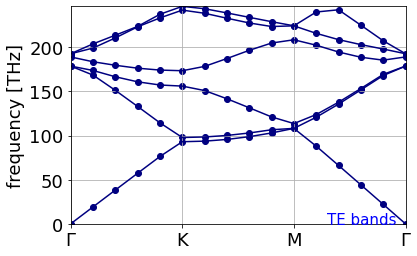

In [124]:
#THz表示
a = 820
c_const = 299792458

fontsize = 18
te_freqs_THz = np.array(te_freqs) * c_const/(a*10**3)
te_gaps_THz = np.array(te_gaps) * c_const/(a*10**3)
#print(te_freqs_THz)

fig, ax = plt.subplots()

x = range(len(te_freqs))

for xz, tez in zip(x, te_freqs_THz):
    ax.scatter([xz]*len(tez), tez, color='navy')

ax.plot(te_freqs_THz, color='navy')
ax.set_ylim([te_freqs_THz.min(), te_freqs_THz.max()])
ax.set_xlim([x[0], x[-1]])

for gap in te_gaps_THz:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='blue', alpha=0.2)

ax.text(11.5, 0, 'TE bands', color='blue', size=15)

points_in_between = (len(te_freqs) - 4) / 3
tick_locs = [i*points_in_between+i for i in range(4)]
tick_labs = ['Γ', 'K', 'M', 'Γ']
ax.set_xticks(tick_locs)
ax.set_xticklabels(tick_labs, size=fontsize)
ax.set_ylabel('frequency [THz]', size=fontsize)
plt.tick_params(labelsize=fontsize)
ax.grid(True)

plt.show()